### Importing required libraries

In [482]:
import requests         
from bs4 import BeautifulSoup
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Web scraping

In [491]:
movie_name=[]
year=[]
certificate=[]
time=[]
genre=[]
rating=[]
directors=[]
stars=[]
metascore=[]
votes=[]
gross=[]

for i in range(1,6):
    urls="https://www.imdb.com/list/ls050782187/?sort=list_order,asc&st_dt=&mode=detail&page="+str(i)
    print(urls)
    page = requests.get(urls)
    soup = BeautifulSoup(page.text)
    
    for i in soup.find_all("h3",class_="lister-item-header"):
        movie_name.append(i.text.split("\n")[2])


    for i in soup.find_all("h3",class_="lister-item-header"):
                year.append(i.text.split("\n")[3].split("(")[1].split(")")[0].replace("TV Movie",""))


    for i in soup.find_all("span","runtime"):
        time.append(i.text.split()[0])


    for i in soup.find_all("span",class_="genre"):
        genre.append(i.text.strip())



    for i in soup.find_all("div",class_="ipl-rating-star small"):
            rating.append(i.text.replace("\n",""))
  

    for i in soup.find_all("p",class_="text-muted text-small")[1::3]:
        directors.append(i.text.split(":")[1].split("|")[0].replace("\n",""))


    for i in  soup.find_all("p",class_="text-muted text-small")[1::3]:
        stars.append(i.text.split(":")[2].replace("\n",""))
        
    

    for i in soup.find_all("div",class_="lister-item-content"):

        if i.find("span",class_="metascore"): 
            meta=i.find("span",class_="metascore").text.replace(" ","") 
            metascore.append(meta)
        else:
            (metascore.append(np.nan))

        if i.find("span",class_="certificate"):
            cer=i.find("span",class_="certificate").text
            certificate.append(cer)
        else:
            certificate.append(np.nan)

        value= i.find_all("span",attrs={"name":"nv"})
        v=value[0].text
        votes.append(v)

        if len(value)>1:
            grosses=value[1].text.replace("$","").replace("M","") 
            gross.append(grosses)
        else:
            gross.append(np.nan)
    
movie_release_year=[]            
for x in year:
    if x=="I":
        movie_release_year.append(np.nan)
    else:
        movie_release_year.append(x)  
    

            
print(len(movie_name))
print(len(movie_release_year))
print(len(time))
print(len(genre))
print(len(rating))
print(len(metascore))
print(len(certificate))
print(len(directors))
print(len(stars))
print(len(votes))
print(len(gross))


https://www.imdb.com/list/ls050782187/?sort=list_order,asc&st_dt=&mode=detail&page=1
https://www.imdb.com/list/ls050782187/?sort=list_order,asc&st_dt=&mode=detail&page=2
https://www.imdb.com/list/ls050782187/?sort=list_order,asc&st_dt=&mode=detail&page=3
https://www.imdb.com/list/ls050782187/?sort=list_order,asc&st_dt=&mode=detail&page=4
https://www.imdb.com/list/ls050782187/?sort=list_order,asc&st_dt=&mode=detail&page=5
500
500
500
500
500
500
500
500
500
500
500


### creating dataframe

In [493]:
movies=pd.DataFrame({"Movie name":movie_name,                   
                "Release year":movie_release_year,
                 "Certificate":certificate,
                 "Runtime":time,
                 "Genre":genre,
                "Rating":rating,
                 "Metascore":metascore,
                "Directors":directors,
                "Stars":stars,
                "Votes":votes,
                 "Gross":gross
                })

### Converting dataframe to csv file

In [494]:
movies.to_csv("movies.csv")

### read csv file

In [495]:
data=pd.read_csv(r"C:\Users\seeth\python 232\Data Analysis\movies.csv")

In [496]:
df=data.copy()

In [497]:
df

,Unnamed: 0,Movie name,Release year,Certificate,Runtime,Genre,Rating,Metascore,Directors,Stars,Votes,Gross
0,0,The Godfather,1972.0,A,175,"Crime, Drama",9.2,100.0,Francis Ford Coppola,"Marlon Brando, Al Pacino, James Caan, Diane Ke...","1,935,010",134.97
1,1,The Silence of the Lambs,1991.0,A,118,"Crime, Drama, Thriller",8.6,86.0,Jonathan Demme,"Jodie Foster, Anthony Hopkins, Lawrence A. Bon...","1,482,876",130.74
2,2,Star Wars: Episode V - The Empire Strikes Back,1980.0,UA,124,"Action, Adventure, Fantasy",8.7,82.0,Irvin Kershner,"Mark Hamill, Harrison Ford, Carrie Fisher, Bil...","1,334,031",290.48
3,3,The Shawshank Redemption,1994.0,A,142,Drama,9.3,82.0,Frank Darabont,"Tim Robbins, Morgan Freeman, Bob Gunton, Willi...","2,779,283",28.34
4,4,The Shining,1980.0,A,146,"Drama, Horror",8.4,66.0,Stanley Kubrick,"Jack Nicholson, Shelley Duvall, Danny Lloyd, S...","1,061,340",44.02
...,...,...,...,...,...,...,...,...,...,...,...,...
495,495,"Me, Myself & Irene",2000.0,A,116,Comedy,6.6,49.0,"Bobby Farrelly, Peter Farrelly","Jim Carrey, Renée Zellweger, Anthony Anderson,...","245,098",90.57
496,496,The Darjeeling Limited,2007.0,R,91,"Adventure, Comedy, Drama",7.2,67.0,Wes Anderson,"Owen Wilson, Adrien Brody, Jason Schwartzman, ...","209,816",11.90
497,497,Fear,1996.0,Not Rated,97,"Drama, Thriller",6.2,51.0,James Foley,"Mark Wahlberg, Reese Witherspoon, William Pete...","51,700",20.75
498,498,Planet Terror,2007.0,A,105,"Action, Comedy, Horror",7.0,NaN,Robert Rodriguez,"Rose McGowan, Freddy Rodríguez, Josh Brolin, M...","218,222",NaN


Dropping unnamed column because it acts as the index but by default dataframe have index.

In [498]:
df.drop("Unnamed: 0",axis=1,inplace=True)

In [499]:
df.head()

,Movie name,Release year,Certificate,Runtime,Genre,Rating,Metascore,Directors,Stars,Votes,Gross
0,The Godfather,1972.0,A,175,"Crime, Drama",9.2,100.0,Francis Ford Coppola,"Marlon Brando, Al Pacino, James Caan, Diane Ke...","1,935,010",134.97
1,The Silence of the Lambs,1991.0,A,118,"Crime, Drama, Thriller",8.6,86.0,Jonathan Demme,"Jodie Foster, Anthony Hopkins, Lawrence A. Bon...","1,482,876",130.74
2,Star Wars: Episode V - The Empire Strikes Back,1980.0,UA,124,"Action, Adventure, Fantasy",8.7,82.0,Irvin Kershner,"Mark Hamill, Harrison Ford, Carrie Fisher, Bil...","1,334,031",290.48
3,The Shawshank Redemption,1994.0,A,142,Drama,9.3,82.0,Frank Darabont,"Tim Robbins, Morgan Freeman, Bob Gunton, Willi...","2,779,283",28.34
4,The Shining,1980.0,A,146,"Drama, Horror",8.4,66.0,Stanley Kubrick,"Jack Nicholson, Shelley Duvall, Danny Lloyd, S...","1,061,340",44.02


head() returns the top n rows by but default it returns top 5 rows.

In [501]:
df.shape                

(500, 11)

In this dataset there are 500 rows and 11 columns.

### Data cleaning 

In [505]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Movie name    500 non-null    object 
 1   Release year  481 non-null    float64
 2   Certificate   476 non-null    object 
 3   Runtime       500 non-null    int64  
 4   Genre         500 non-null    object 
 5   Rating        500 non-null    float64
 6   Metascore     491 non-null    float64
 7   Directors     500 non-null    object 
 8   Stars         500 non-null    object 
 9   Votes         500 non-null    object 
 10  Gross         480 non-null    float64
dtypes: float64(4), int64(1), object(6)
memory usage: 43.1+ KB


In this dataset we have 500 datapoints which are nothing but rows and index range is from 0 to 499.

Total data columns are 11.The columns names are 'Movie name', 'Release year', 'Certificate', 'Runtime', 'Genre',
       'Rating', 'Metascore', 'Directors', 'Stars', 'Votes', 'Gross'.

In that there are null values and there are different datatypes which should be changed.


In [507]:
df.isnull().sum()

Movie name       0
Release year    19
Certificate     24
Runtime          0
Genre            0
Rating           0
Metascore        9
Directors        0
Stars            0
Votes            0
Gross           20
dtype: int64

There are 19 null values in Release year column,24 null values in Certificate column,9 null values in Metascore column and 20 null values in Gross column.

In [509]:
df["Certificate"]=df["Certificate"].fillna("Not certified")
df["Metascore"]=df["Metascore"].fillna(0)
df["Gross"]=df["Gross"].fillna(df["Gross"].median())



fillna() is used to fill the null values 

In [510]:
df.dropna(inplace=True)

dropna() is used to drop the null values

In [513]:
df.isnull().sum()

Movie name      0
Release year    0
Certificate     0
Runtime         0
Genre           0
Rating          0
Metascore       0
Directors       0
Stars           0
Votes           0
Gross           0
dtype: int64

In [514]:
df["Votes"]=df["Votes"].str.replace(",","")
df["Votes"]

0      1935010
1      1482876
2      1334031
3      2779283
4      1061340
        ...   
495     245098
496     209816
497      51700
498     218222
499     235988
Name: Votes, Length: 481, dtype: object

In [515]:
df["Runtime"]=df["Runtime"].astype("int")
df["Rating"]=df["Rating"].astype("float")
df["Metascore"]=df["Metascore"].astype("int")
df["Release year"]=df["Release year"].astype("int")
df["Votes"]=df["Votes"].astype("int")
df["Gross"]=df["Gross"].astype("float")
df["Certificate"]=df["Certificate"].fillna("Not Certified")


To convert one datatype to another datatype we used astype

### Exploratory Data Analysis

In [523]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 481 entries, 0 to 499
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Movie name    481 non-null    object 
 1   Release year  481 non-null    int32  
 2   Certificate   481 non-null    object 
 3   Runtime       481 non-null    int32  
 4   Genre         481 non-null    object 
 5   Rating        481 non-null    float64
 6   Metascore     481 non-null    int32  
 7   Directors     481 non-null    object 
 8   Stars         481 non-null    object 
 9   Votes         481 non-null    int32  
 10  Gross         481 non-null    float64
dtypes: float64(2), int32(4), object(5)
memory usage: 37.6+ KB


After filling and droping the null values there are 481 datapoints,11 columns and 0 null values 

In [524]:
df.duplicated().sum()

0

There are no duplicates in the dataset

In [525]:
df.columns

Index(['Movie name', 'Release year', 'Certificate', 'Runtime', 'Genre',
       'Rating', 'Metascore', 'Directors', 'Stars', 'Votes', 'Gross'],
      dtype='object')

Columns attribute returns the column names from the dataset

In [526]:
df.describe()

,Release year,Runtime,Rating,Metascore,Votes,Gross
count,481.000000,481.000000,481.000000,481.000000,4.810000e+02,481.000000
mean,1994.280665,124.033264,7.679002,72.390852,4.601598e+05,87.719272
std,16.721438,24.862181,0.592976,16.851343,4.556072e+05,108.463405
min,1931.000000,76.000000,5.600000,0.000000,8.150000e+02,0.010000
25%,1988.000000,106.000000,7.400000,63.000000,1.377690e+05,18.340000
50%,2000.000000,121.000000,7.700000,74.000000,3.039530e+05,52.630000
75%,2006.000000,137.000000,8.100000,84.000000,6.685580e+05,117.240000
max,2015.000000,238.000000,9.300000,100.000000,2.779283e+06,936.660000


Describe() generate descriptive statistics.

In [527]:
genre=df["Genre"].value_counts()
genre

Drama                           23
Crime, Drama                    21
Drama, Romance                  20
Crime, Drama, Thriller          18
Comedy, Drama, Romance          17
                                ..
Animation, Family, Fantasy       1
Adventure, Drama, History        1
Western                          1
Adventure, Mystery, Thriller     1
Adventure, Horror, Thriller      1
Name: Genre, Length: 144, dtype: int64

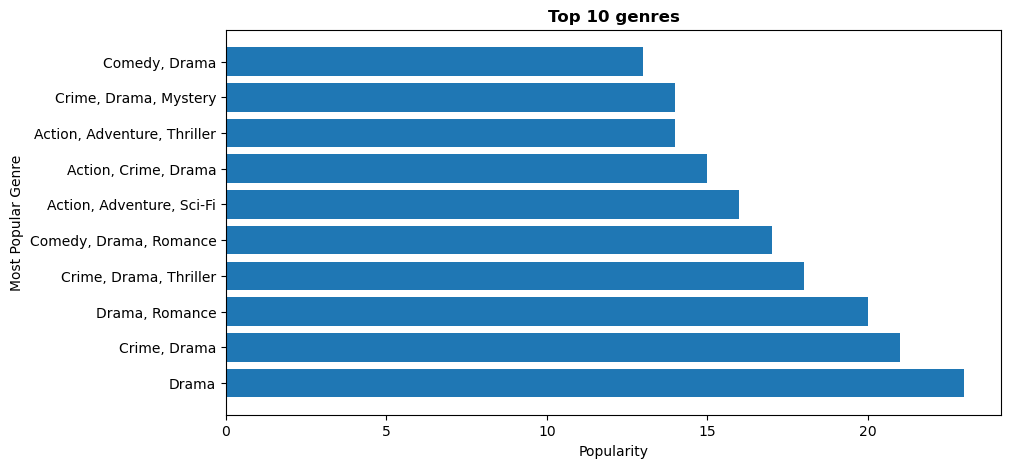

In [528]:
movies=genre[0:10].index
count=list(genre.iloc[:10])

plt.figure(figsize=(10,5))
plt.barh(movies,count)
plt.ylabel("Most Popular Genre")
plt.xlabel("Popularity")
plt.title("Top 10 genres",fontweight ="bold")
plt.show()

This plot shows the top 10 genres of movies.
- Drama is the most popular genre.
- Second popularity goes to crime,drama.
- and next drama,romance and follows.
These are the top 3 genres which have the high popularity

In [529]:
df["Directors"].value_counts().head(10)

Steven Spielberg     12
Martin Scorsese       9
Peter Jackson         8
Quentin Tarantino     8
Christopher Nolan     8
Alfred Hitchcock      7
David Fincher         6
James Cameron         6
Ridley Scott          6
Pedro Almodóvar       5
Name: Directors, dtype: int64

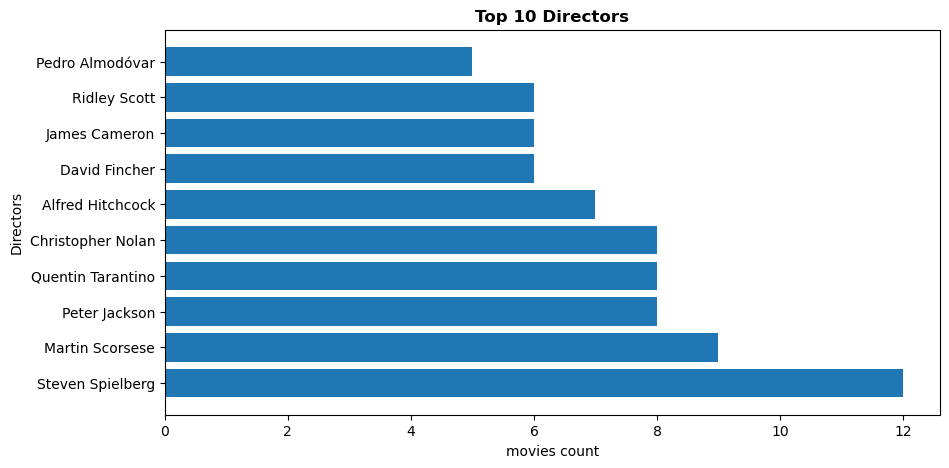

In [530]:
dire=df["Directors"].value_counts().head(10).index
count=df["Directors"].value_counts().head(10).values

plt.figure(figsize=(10,5))
plt.barh(dire,count)
plt.ylabel("Directors")
plt.xlabel("movies count")
plt.title("Top 10 Directors",fontweight ="bold")
plt.show()

This plot shows the top 10 directors of movies.
- Steven spielberg is the top director which he directed upto 12 movies.
- Martin Scorses is the second top director which he directed upto 9 movies.
- and next Peter Jackson which he directed upto 8 movies and follows.
They are the top most 3 directors which are having the highest movies count according to this dataset. 

C:\Users\seeth\AppData\Local\Temp\ipykernel_24192\4050076513.py:1: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(x=df["Rating"],hue=df["Certificate"])
C:\Users\seeth\AppData\Local\Temp\ipykernel_24192\4050076513.py:1: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(x=df["Rating"],hue=df["Certificate"])


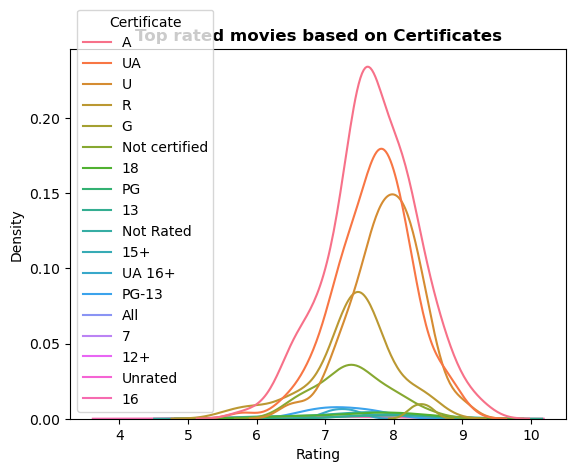

In [433]:
sns.kdeplot(x=df["Rating"],hue=df["Certificate"])
plt.title("Top rated movies based on Certificates",fontweight ="bold")
plt.show()


From the above kdeplot the density of top rated movies based on certificates is high for "A" certificate

In [534]:
gr=df.groupby("Gross")["Movie name"].sum().sort_index(ascending=False).head(20)

In [535]:
gr.sort_index(ascending=False)

Gross
936.66           Star Wars: Episode VII - The Force Awakens
760.51                                               Avatar
659.33                                              Titanic
534.86                                      The Dark Knight
448.14                                The Dark Knight Rises
435.11                           E.T. the Extra-Terrestrial
424.67                      The Hunger Games: Catching Fire
423.32           Pirates of the Caribbean: Dead Man's Chest
422.78                                        The Lion King
408.01                                     The Hunger Games
402.45                                        Jurassic Park
380.84                                         Finding Nemo
380.26         Star Wars: Episode III - Revenge of the Sith
377.85        The Lord of the Rings: The Return of the King
373.59                                         Spider-Man 2
342.55                The Lord of the Rings: The Two Towers
330.25                            

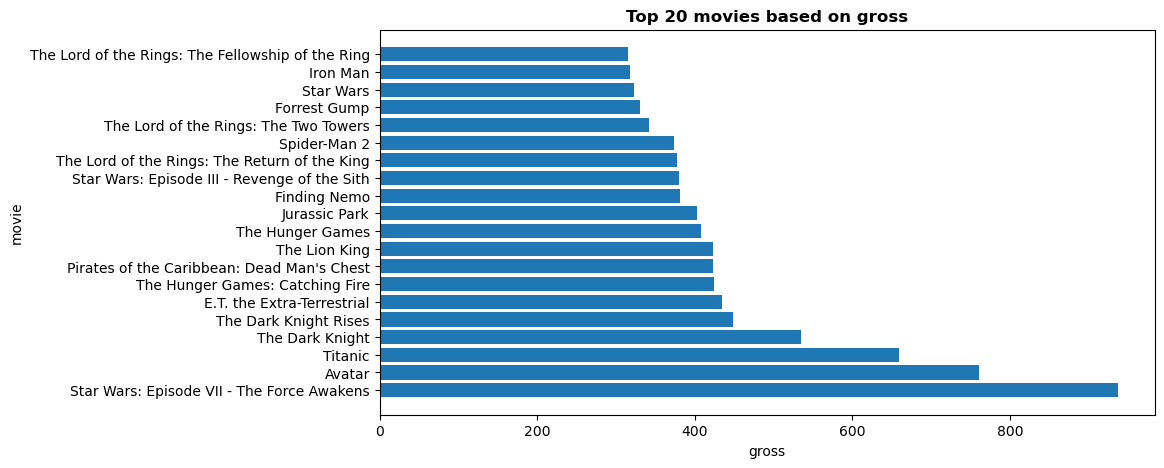

In [536]:
plt.figure(figsize=(10,5))
plt.barh(gr.values,gr.index)
plt.ylabel("movie")
plt.xlabel("gross")
plt.title("Top 20 movies based on gross",fontweight ="bold")
plt.show()

From the above plot Star Wars: Episode VII - The Force Awakens has the highest gross and next Avatar movie has highest gross and then titanic

In [537]:
gr1=df.groupby("Gross")["Movie name"].sum().sort_index(ascending=False).head(5)
gr1

Gross
936.66    Star Wars: Episode VII - The Force Awakens
760.51                                        Avatar
659.33                                       Titanic
534.86                               The Dark Knight
448.14                         The Dark Knight Rises
Name: Movie name, dtype: object

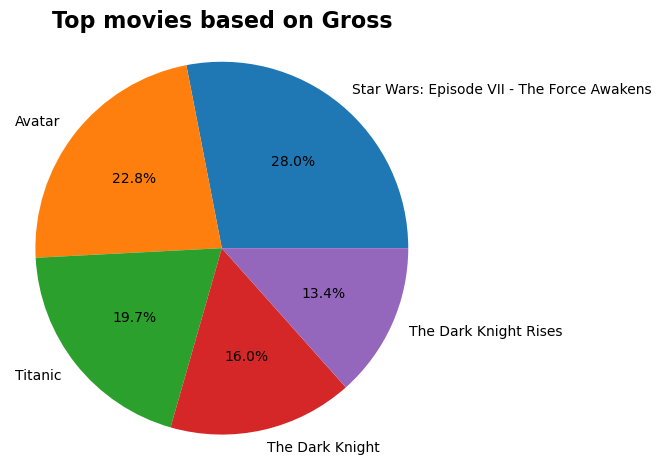

In [538]:
a=gr1.index
b=gr1.values

plt.pie(a,labels=b,autopct="%1.1f%%",radius=1.1,textprops={"fontsize":10})
plt.title('Top movies based on Gross',fontsize=16,fontweight ="bold")
plt.tight_layout()
plt.show()

In [539]:
gr2=df.groupby("Genre")["Metascore"].sum().sort_values(ascending=False).head(5)

In [540]:
a=gr2.index
b=gr2.values
a,b,gr2

(Index(['Drama', 'Crime, Drama', 'Drama, Romance', 'Comedy, Drama, Romance',
        'Crime, Drama, Thriller'],
       dtype='object', name='Genre'),
 array([1808, 1660, 1319, 1269, 1223]),
 Genre
 Drama                     1808
 Crime, Drama              1660
 Drama, Romance            1319
 Comedy, Drama, Romance    1269
 Crime, Drama, Thriller    1223
 Name: Metascore, dtype: int32)

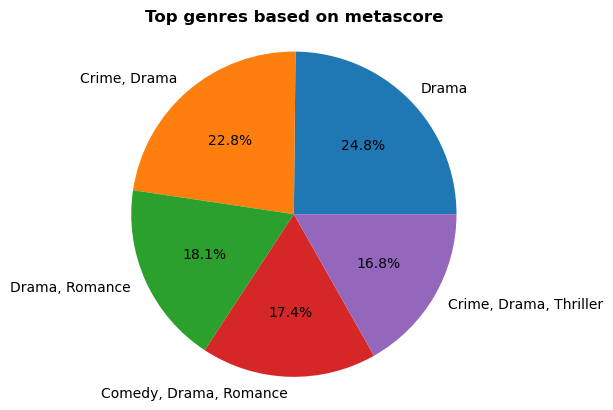

In [541]:
plt.pie(b,labels=a,autopct="%1.1f%%",radius=1.1,textprops={"fontsize":10})
plt.title('Top genres based on metascore',fontsize=12,fontweight ="bold")
plt.show()

In genres Drama has the highest metascore comparing to other genres

In [579]:
df["Runtime"].value_counts()

127    16
101    12
102    12
120    12
124    11
       ..
179     1
195     1
202     1
201     1
187     1
Name: Runtime, Length: 103, dtype: int64

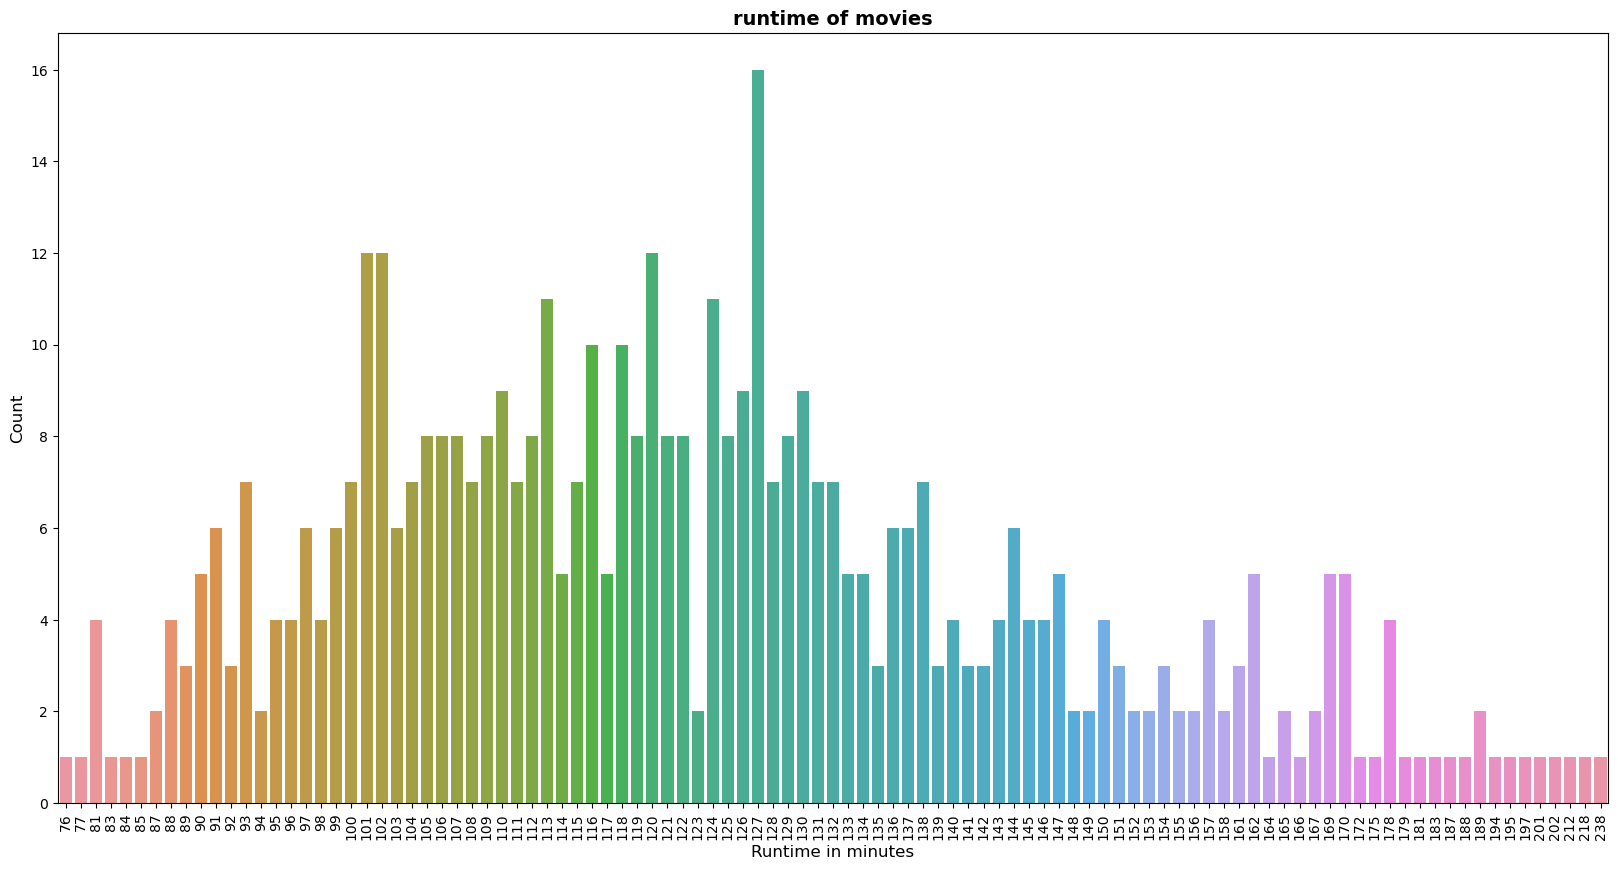

In [580]:
plt.figure(figsize=(20,10))
sns.countplot(x=df["Runtime"])
plt.xticks(rotation='vertical')
plt.title('runtime of movies',fontsize=14, fontweight ="bold")
plt.ylabel('Count',fontsize=12)
plt.xlabel('Runtime in minutes',fontsize=12)
plt.show()

Runtime of most of the movies is 127 minutes and the minimum runtime is 76 minutes and the maximum runtime is 238 mintues.

In [544]:
df["Certificate"].unique()

array(['A', 'UA', 'U', 'R', 'G', 'Not certified', '18', 'PG', '13',
       'Not Rated', '15+', 'UA 16+', 'PG-13', 'All', '7', '12+',
       'Unrated', '16'], dtype=object)

In [545]:
df["Certificate"].value_counts()

A                171
UA               116
U                 91
R                 51
Not certified     24
PG-13              5
Not Rated          4
18                 4
13                 2
15+                2
UA 16+             2
G                  2
16                 2
PG                 1
All                1
7                  1
12+                1
Unrated            1
Name: Certificate, dtype: int64

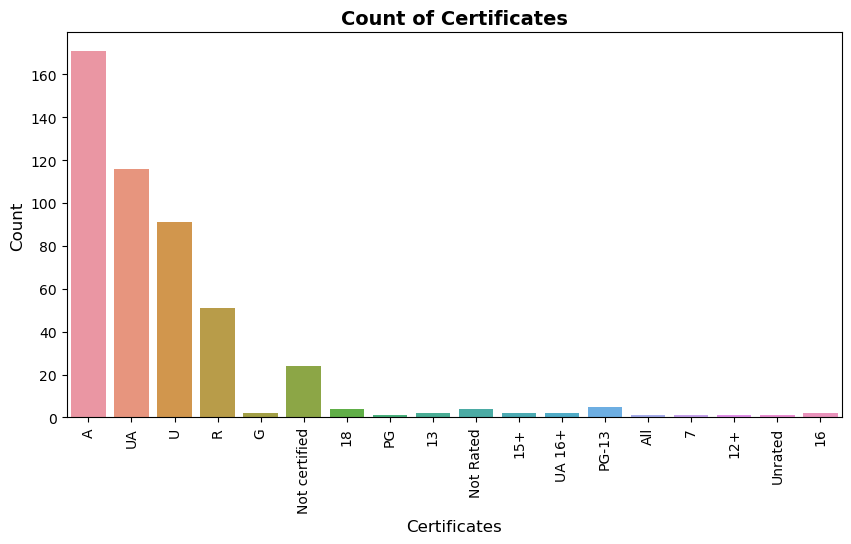

In [548]:
plt.figure(figsize=(10,5))
sns.countplot(x=df["Certificate"])
plt.xticks(rotation='vertical')
plt.title('Count of Certificates',fontsize=14, fontweight ="bold")
plt.ylabel('Count',fontsize=12)                 
plt.xlabel('Certificates',fontsize=12)
plt.show()

From the above plot "A" certificated has the highest count compared to all other certificates

In [549]:
gr4=df.groupby("Genre")["Votes"].sum().sort_values(ascending=False).head(5)
gr4

Genre
Action, Adventure, Sci-Fi     13142026
Drama                         12782668
Crime, Drama                  12332450
Action, Adventure, Fantasy     9472006
Action, Crime, Drama           8745305
Name: Votes, dtype: int32

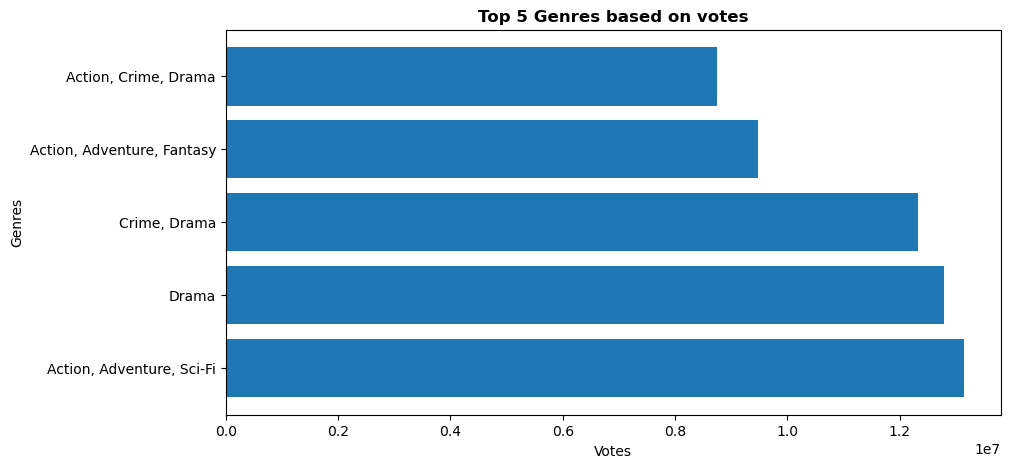

In [550]:
plt.figure(figsize=(10,5))
plt.barh(gr4.index,gr4.values)
plt.ylabel("Genres")
plt.xlabel("Votes")
plt.title("Top 5 Genres based on votes",fontweight ="bold")
plt.show()

From the above plot we can conlude that "Action, Adventure, Sci-Fi" genre movie has high votes follwed by "Drama" and the followed by "Crime, Drama".

In [551]:
gr7=df.groupby("Certificate")["Votes"].sum().sort_values(ascending=False).head()
gr7

Certificate
A     86220321
UA    71715953
U     43557303
R     10358075
18     1801486
Name: Votes, dtype: int32

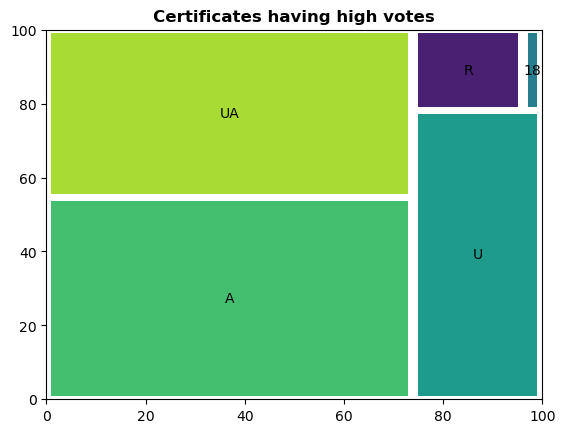

In [552]:
squarify.plot(sizes=gr7.values,label=gr7.index,pad=1)
plt.title("Certificates having high votes",fontweight ="bold")
plt.show()

compared to all other certifiates "A" certificate movie has highest votes

In [555]:
gr8=df.groupby("Certificate")["Votes"].sum().sort_values(ascending=False).tail(10)
gr8

Certificate
16           755941
12+          743380
PG-13        457336
G            441748
Not Rated    355555
All          328540
UA 16+       312178
7            154171
Unrated       73346
PG            36825
Name: Votes, dtype: int32

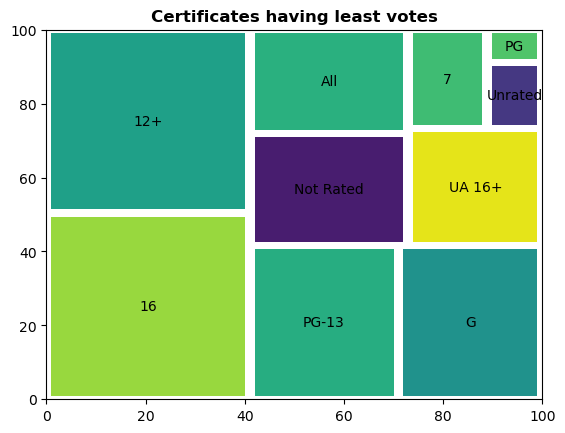

In [556]:
squarify.plot(sizes=gr8.values,label=gr8.index,pad=1)
plt.title("Certificates having least votes",fontweight ="bold")
plt.show()

compared to all other certifiates "PG" certificate movie has lowest votes

In [557]:
gr9=df.groupby("Certificate")["Gross"].sum().sort_values(ascending=False).head()
gr9

Certificate
UA               15581.78
A                12195.39
U                11333.02
R                 1048.97
Not certified      608.89
Name: Gross, dtype: float64

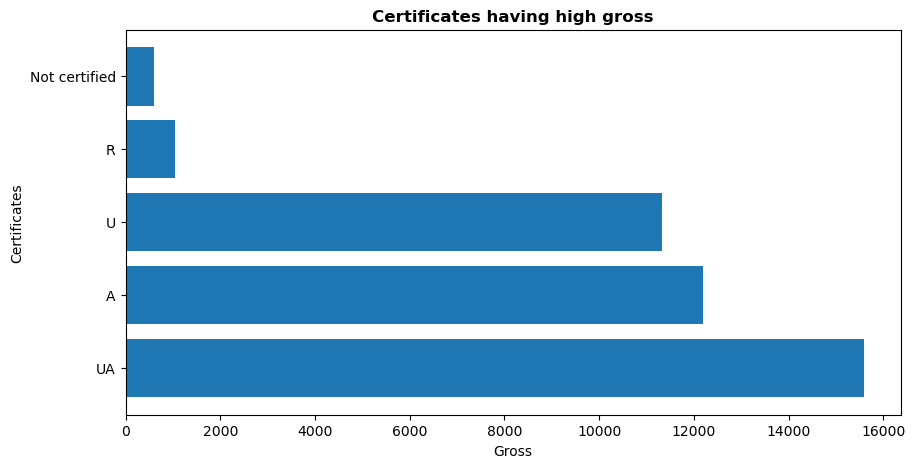

In [558]:
plt.figure(figsize=(10,5))
plt.barh(gr9.index,gr9.values)
plt.xlabel("Gross")
plt.ylabel("Certificates")
plt.title("Certificates having high gross",fontweight ="bold")
plt.show()

when certificates are compared to gross "UA" certified movie has highest gross compare to all

In [454]:
df["Release year"].value_counts()

2000    23
2004    23
2001    23
2005    20
2002    19
        ..
1944     1
1952     1
1941     1
1942     1
1961     1
Name: Release year, Length: 72, dtype: int64

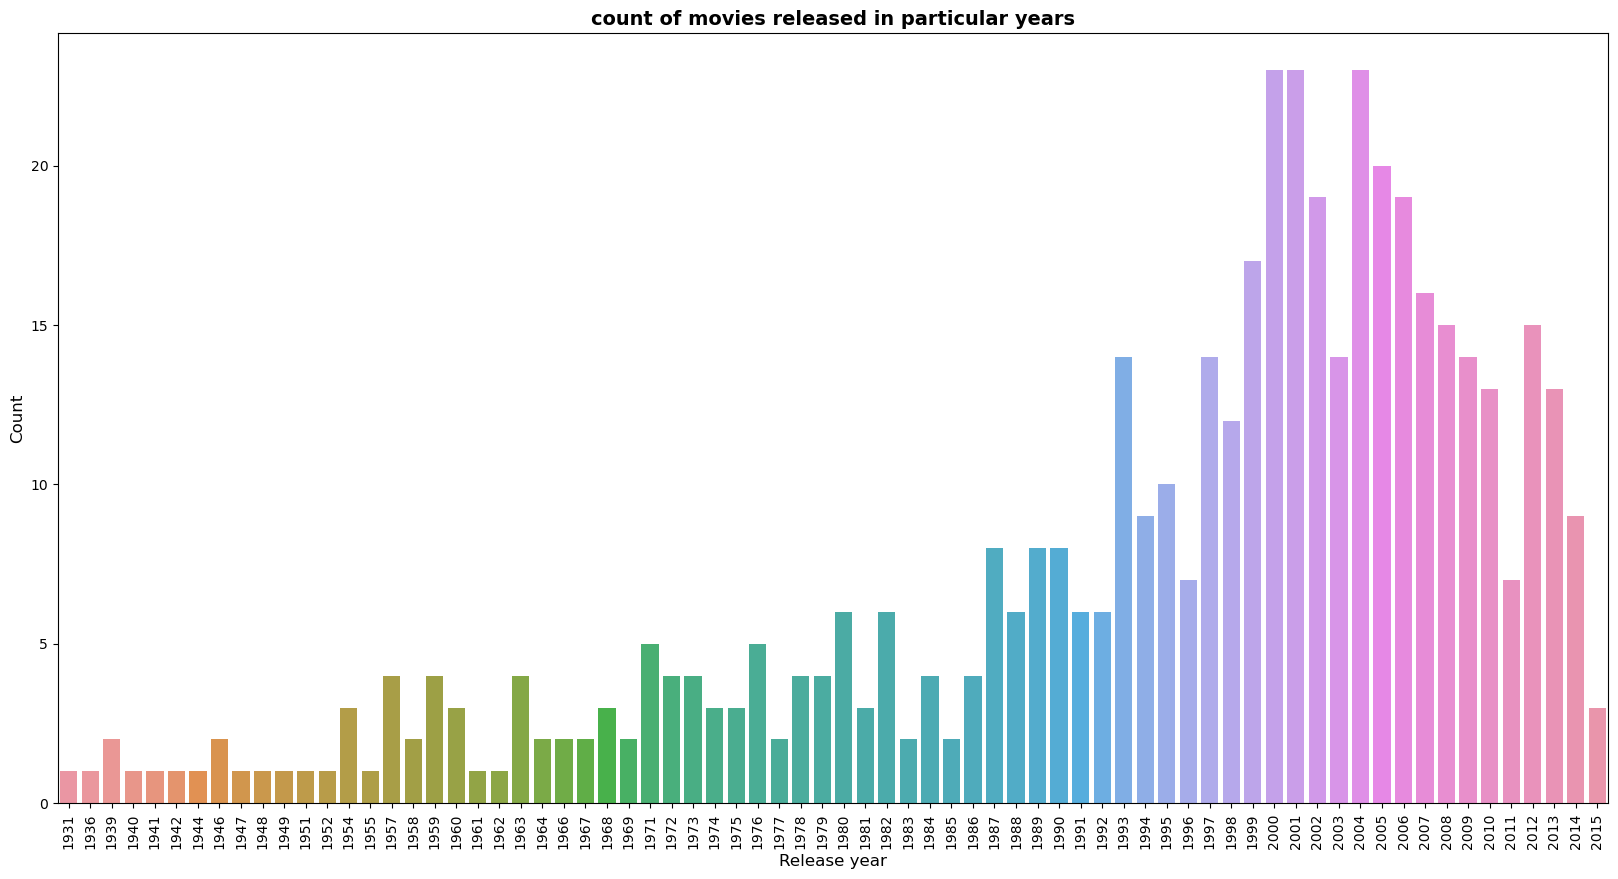

In [455]:
plt.figure(figsize=(20,10))
sns.countplot(x=df["Release year"])
plt.xticks(rotation='vertical')
plt.title('count of movies released in particular years',fontsize=14, fontweight ="bold")
plt.ylabel('Count',fontsize=12)                 
plt.xlabel('Release year',fontsize=12)
plt.show()

2000,2001,2004 are the years where most of the movies are released in that year.

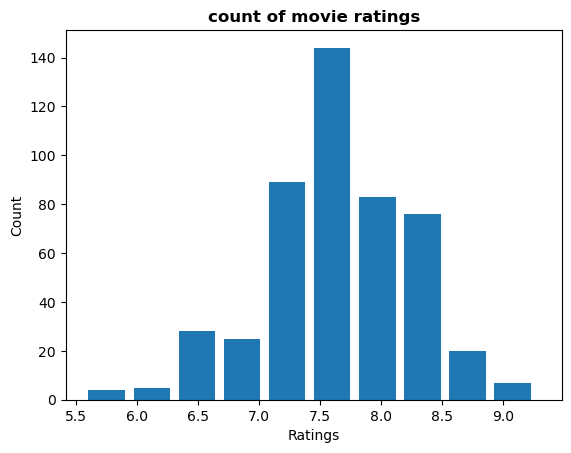

In [563]:
plt.hist(df["Rating"],width=0.3)
plt.title("count of movie ratings",fontweight ="bold")
plt.xlabel("Ratings")
plt.ylabel("Count")
plt.show()

most of the movies has ratings between 7.4 to 7.9 and less movies has highest rating of 9 to 9.3

In [564]:
groupd=df.groupby("Directors")["Rating"].sum().sort_values(ascending=False)[:10]
groupd

Directors
Steven Spielberg     96.2
Martin Scorsese      72.2
Christopher Nolan    67.2
Quentin Tarantino    64.6
Peter Jackson        64.3
Alfred Hitchcock     57.0
James Cameron        48.4
David Fincher        48.4
Ridley Scott         48.1
Robert Zemeckis      39.5
Name: Rating, dtype: float64

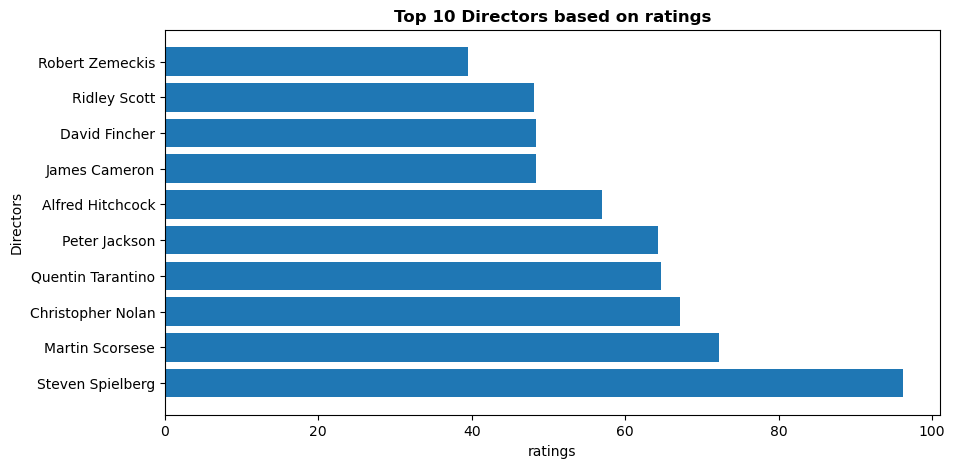

In [565]:
plt.figure(figsize=(10,5))
plt.barh(groupd.index,groupd.values)
plt.ylabel("Directors")
plt.xlabel("ratings")
plt.title("Top 10 Directors based on ratings",fontweight ="bold")
plt.show()

This plot shows the top 10 directors based on ratings according to this data.

Steven Spielberg is top director where he has highest rating followed by Martin Scorsese is the second top director and then followed by Christopher Nolan are in the top 3 positions based on their movie ratings.

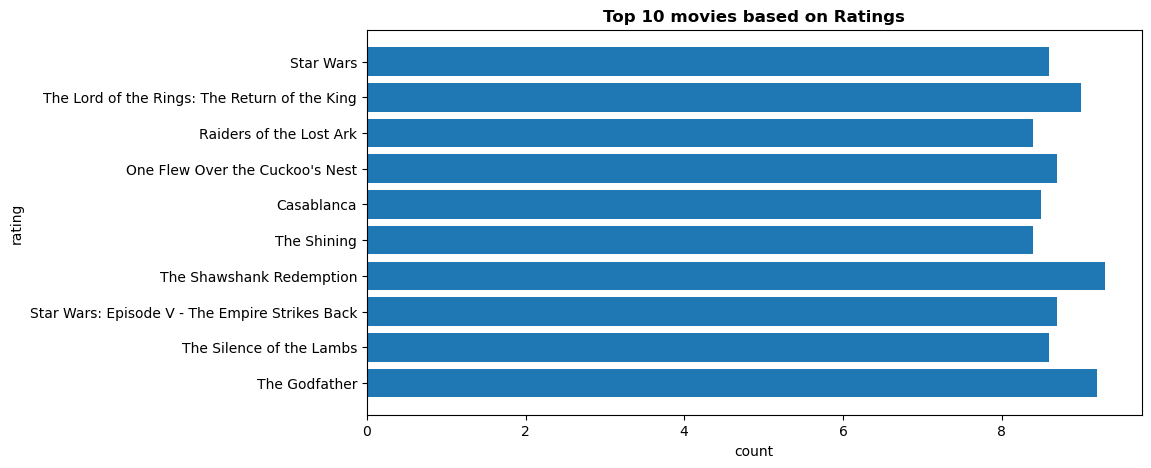

In [566]:
rate=df["Rating"].head(10).values
movie=df["Movie name"].head(10)

plt.figure(figsize=(10,5))
plt.barh(movie,rate)
plt.ylabel("rating")
plt.xlabel("count")
plt.title("Top 10 movies based on Ratings",fontweight ="bold")
plt.show()

The Shawshank Redemption is the top movie based on ratings and then The Godfather

In [569]:
gr3=df.groupby("Genre")["Rating"].sum().sort_values(ascending=False).head(5)
gr3

Genre
Drama                     185.1
Crime, Drama              168.9
Drama, Romance            148.6
Crime, Drama, Thriller    137.8
Comedy, Drama, Romance    129.4
Name: Rating, dtype: float64

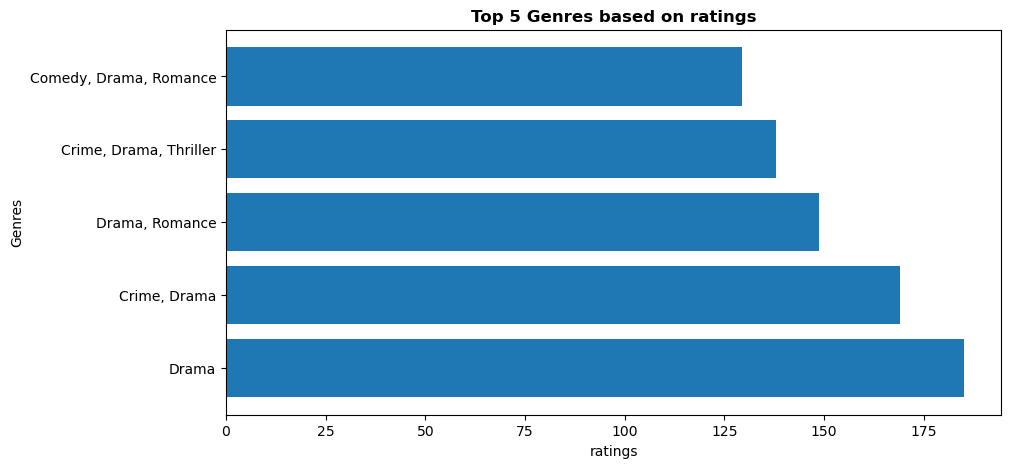

In [570]:
plt.figure(figsize=(10,5))
plt.barh(gr3.index,gr3.values)
plt.ylabel("Genres")
plt.xlabel("ratings")
plt.title("Top 5 Genres based on ratings",fontweight ="bold")
plt.show()

Top most genre based on ratings is "Drama" and then followed by Crime,Drame.

In [571]:
gr5=df.groupby("Certificate")["Rating"].sum().sort_values(ascending=False).head()
gr5

Certificate
A                1315.6
UA                894.4
U                 717.6
R                 377.3
Not certified     177.6
Name: Rating, dtype: float64

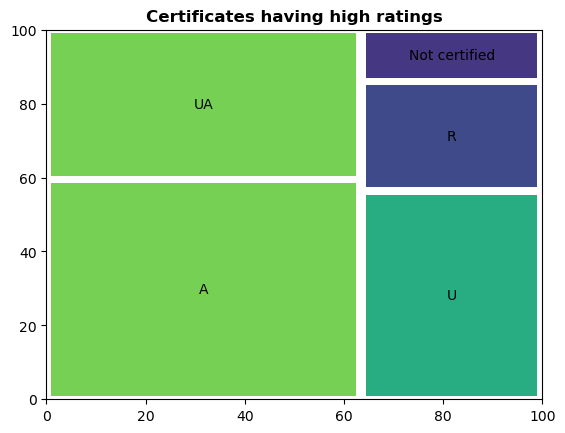

In [572]:
squarify.plot(sizes=gr5.values,label=gr5.index,pad=1)
plt.title("Certificates having high ratings",fontweight ="bold")
plt.show()

"A" Certificated movies has highest ratings comparing to all other certified movies

In [575]:
gr6=df.groupby("Certificate")["Rating"].sum().sort_values(ascending=False).tail(10)
gr6

Certificate
G          16.8
13         16.1
15+        15.9
UA 16+     14.5
16         13.8
7           8.0
PG          7.8
Unrated     7.6
All         7.6
12+         7.4
Name: Rating, dtype: float64

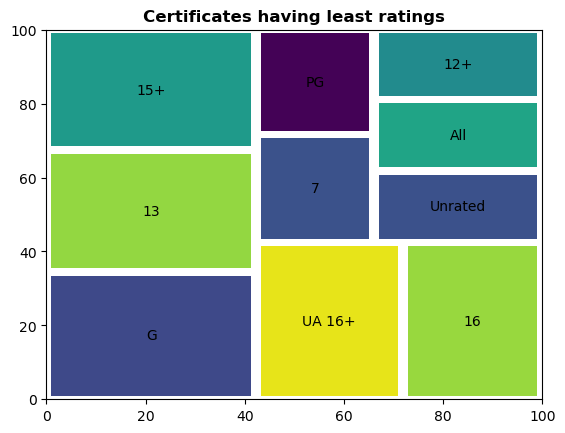

In [576]:
squarify.plot(sizes=gr6.values,label=gr6.index,pad=1)
plt.title("Certificates having least ratings",fontweight ="bold")
plt.show()

12+ Certificates have the least rating compared to all 

### Conclusion

At last we conclude that:

- Steven Spielberg is top director based on movie rating.
- The Shawshank Redemption is the top movie based on rating.
- Top most genre based on ratings is "Drama".
- "A"Certificate movies had highest rating.
- "12+" Certificate movies had least rating

- "Star Wars: Episode VII - The Force Awakens" movie has the highest gross.
- "Drama" is the genre which has the highest metascore.
- most of the movies are "A" certified movies.
- "Action, Adventure, Sci-Fi" is the genre which has high votes.
- "A" certificate movies had highest votes.
- "PG" certificate movie had lowest votes.
- "UA" certified movies had highest gross.